In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1MB 8.2MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=9c645942d76c20bc776ebd14b44ca14c009da414e7d158c813990414c23c9342
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [ ]:
pip install pycountry-convert

     |████████████████████████████████| 245kB 11.2MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.4 which is incompatible.
ERROR: pytest-mock 3.5.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.11.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [ ]:
pip install pandas

In [5]:
import pycountry
import pycountry_convert as pc
import pandas as pd1
datafile=pd1.read_excel('indicator hiv estimated prevalence% 15-49.xlsx') # Imported Excel file to a Data Frame
noofrows=datafile.iloc[:,0].count() # To perform slicing and then count the total number of rows by using count function
data=pycountry.countries # Assign all countries into data variable
inp=[]  
re=[] 
cont=[]
code=[]


for i in range(noofrows):
    re.append(i)#Append all index values to list
    for a in data:
        b=str(a)#convert each element to string for comparison
        rem=b.split("numeric")[0]
        temp=datafile['Estimated HIV Prevalence% - (Ages 15-49)'][i]
        
        
        try:
            
            if temp in rem: 
                if temp not in code:
                
                    code.append(temp) #Append all countries that satisifies if function to neglect duplicates 
                
                
                    temp1=temp
            
                    country_code = pc.country_name_to_country_alpha2(temp1,cn_name_format="default")
                   
                    continent_name = pc.country_alpha2_to_continent_code(country_code)
                    cont.append(continent_name)#Append continents
                    
                    inp.append(i)#Append all countires 
                
        except:
            
            continue
def Diff(lis1, lis2): #To find difference between two lists
    lis_dif = [i for i in lis1 + lis2 if i not in lis1 or i not in lis2] 
    return lis_dif 

lists=Diff(inp,re) 

length=len(lists) #To find length of the countries that have no continents
for i in range(length):
    ab=lists[i]
    
    cont.insert(ab,'No continent') #To insert no continent index with name 'no continents'
datafile.insert(1,'Continents',cont,True)# To insert new colume continents in dataframe
datafile.to_csv('Outputfile.csv')# To create new CSV file with updated dataframe

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


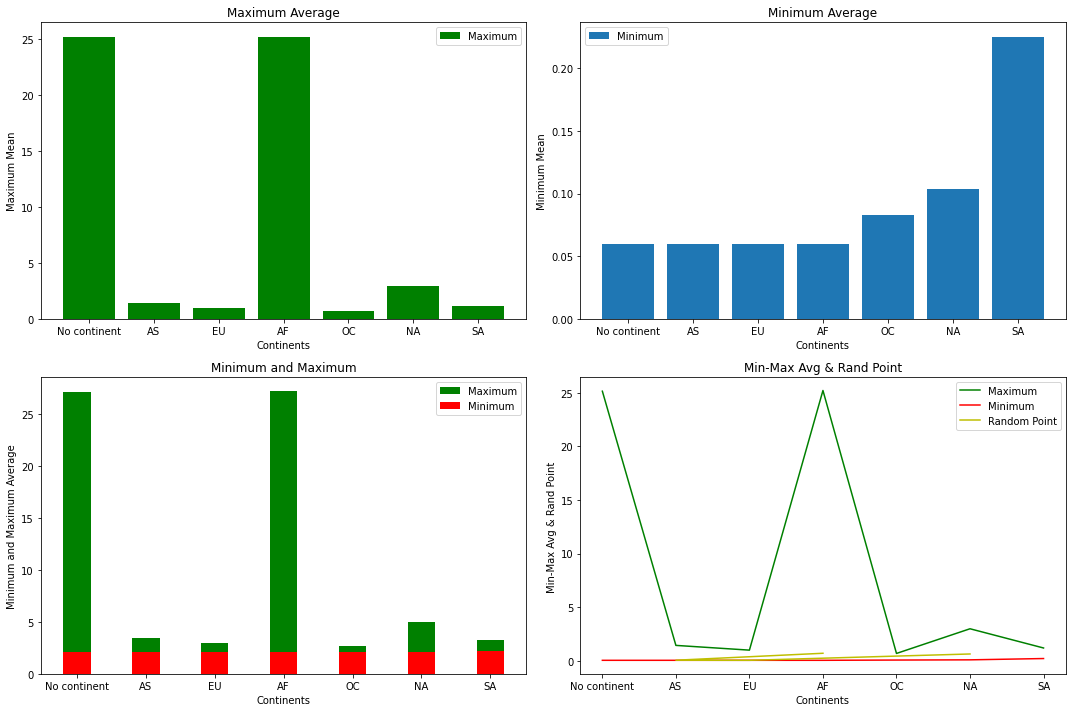

In [6]:
import matplotlib.pyplot as p
import pandas as pd
import numpy as np
filename=pd.read_csv('Outputfile.csv') # To read CSV file
filename['Continents'] = filename['Continents'].replace(np.nan, 'NA') # Replaces all null values to NA
mean=filename[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']].mean(axis=1)#calculate Mean to countries
filename['mean']=mean
maximum=filename.groupby(['Continents'],as_index=False, sort=False)['mean','Estimated HIV Prevalence% - (Ages 15-49)'].max() #Maximum mean values
minimum=filename.groupby(['Continents'],as_index=False, sort=False)['mean','Estimated HIV Prevalence% - (Ages 15-49)'].min() #Minimum mean values
fn1=filename[['Continents','mean','Estimated HIV Prevalence% - (Ages 15-49)']] #created new Data Frame
con1=pd.concat([fn1,maximum],ignore_index=True,sort=True).drop_duplicates('Estimated HIV Prevalence% - (Ages 15-49)',keep=False)
new=pd.concat([con1,minimum],ignore_index=True,sort=True).drop_duplicates('Estimated HIV Prevalence% - (Ages 15-49)',keep=False)
fn1 = lambda obj: obj.loc[np.random.choice(obj.index, 1, replace=True),:] #select one random country with mean value everytime
final=new.groupby('Continents', as_index=False).apply(fn1)#groupby all continents  with one random countries
fig=p.figure(figsize=(15,10)) # plot graphs
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2) 
ax3=fig.add_subplot(2,2,3) 
ax4=fig.add_subplot(2,2,4) 
ax1.bar(maximum['Continents'],maximum['mean'],color=('g'),label='Maximum')
ax2.bar(minimum['Continents'],minimum['mean'],label='Minimum')
ax3.bar(maximum['Continents'],maximum['mean']+2,width=0.4,color='g',label='Maximum')
ax3.bar(minimum.index,minimum['mean']+2,width=0.4,color='r',label='Minimum')# Bar chart
ax4.plot(maximum['Continents'],maximum['mean'],color='g',label='Maximum') 
ax4.plot(minimum['Continents'],minimum['mean'],color='r',label='Minimum') 
ax4.plot(final['Continents'],final['mean'],color='y',label='Random Point')
ax1.set_title("Maximum Average")
ax1.set_xlabel("Continents")
ax1.set_ylabel("Maximum Mean")
ax2.set_title("Minimum Average")
ax2.set_xlabel("Continents")
ax2.set_ylabel("Minimum Mean")
ax1.legend()
ax2.legend()
ax3.set_title("Minimum and Maximum")
ax3.set_xlabel("Continents")
ax3.set_ylabel("Minimum and Maximum Average")
ax3.legend()
ax4.set_title("Min-Max Avg & Rand Point")
ax4.set_xlabel("Continents")
ax4.set_ylabel("Min-Max Avg & Rand Point ")
ax4.legend()
p.tight_layout()#fit plots within your figure cleanly


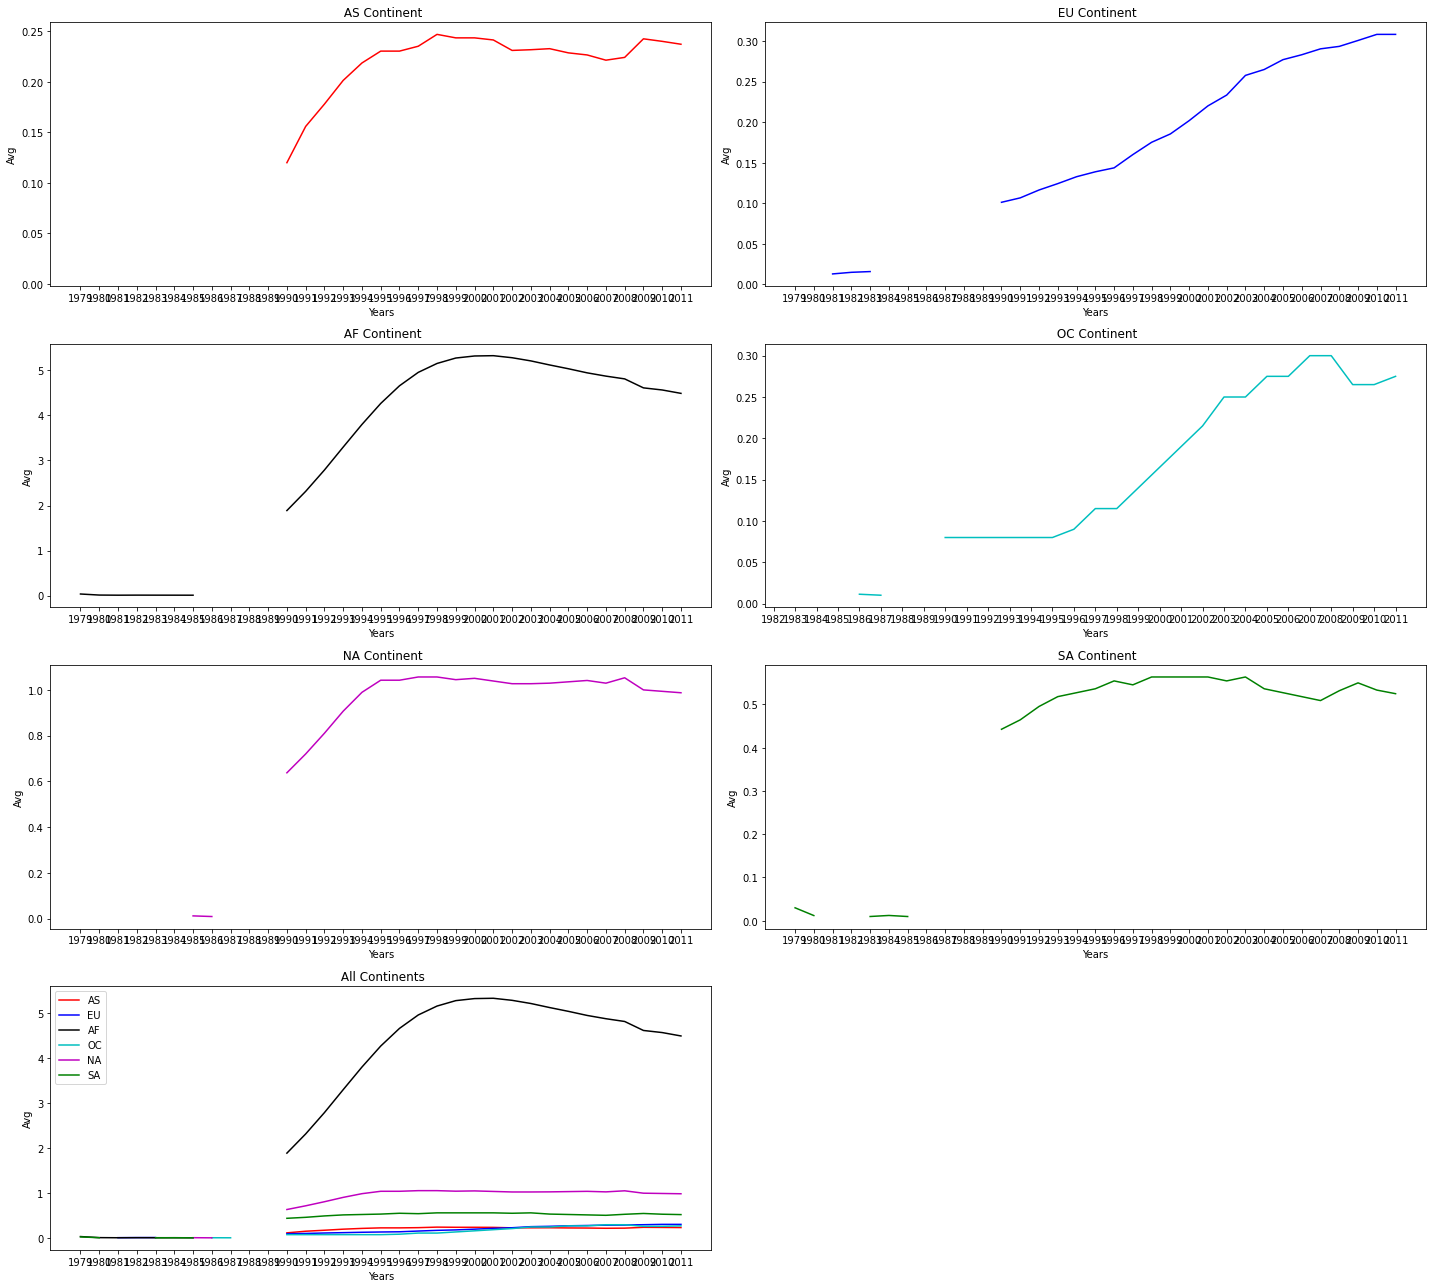

In [7]:
import matplotlib.pyplot as p
import pandas as pd1
import numpy as np
file1=pd1.read_csv('Outputfile.csv')#Read CSV file
file1['Continents'] = file1['Continents'].replace(np.nan, 'NA')# Replaces all null values to NA 
contin=file1.groupby(['Continents'], sort=False).mean().transpose()#Groupby continents and transpose X-axis and Y-axis
continnew=contin.drop(['Unnamed: 0'])
fig=p.figure(figsize=(20,18))#Create new figure to plot graphs
ax1=fig.add_subplot(4,2,1)#Subplotting
ax1.plot(continnew.index,continnew['AS'],color='r')#Create Line chart
ax1.set_xlabel("Years")
ax1.set_ylabel('Avg')
ax1.set_title(" AS Continent")
ax2=fig.add_subplot(4,2,2)
ax2.plot(continnew.index,continnew['EU'],color='b')
ax2.set_xlabel("Years")
ax2.set_ylabel('Avg')
ax2.set_title(" EU Continent")
ax3=fig.add_subplot(4,2,3)# Subplotting
ax3.plot(continnew.index,continnew['AF'],color='k')
ax3.set_xlabel("Years")
ax3.set_ylabel('Avg')
ax3.set_title(" AF Continent")
ax4=fig.add_subplot(4,2,4)
ax4.plot(continnew.index,continnew['OC'],color='c')#To plot Line chart
ax4.set_xlabel("Years")
ax4.set_ylabel('Avg')
ax4.set_title(" OC Continent")
ax5=fig.add_subplot(4,2,5)
ax5.plot(continnew.index,continnew['NA'],color='m')#To plot Line chart
ax5.set_xlabel("Years")
ax5.set_ylabel('Avg')
ax5.set_title(" NA Continent")
ax6=fig.add_subplot(4,2,6)# Subplotting
ax6.plot(continnew.index,continnew['SA'],color='g')
ax6.set_xlabel("Years")
ax6.set_ylabel('Avg')
ax6.set_title(" SA Continent")
ax7=fig.add_subplot(4,2,7)
ax7.plot(continnew.index,continnew['AS'],color='r',label='AS')#Create Overlaid Line chart
ax7.plot(continnew.index,continnew['EU'],color='b',label='EU')
ax7.plot(continnew.index,continnew['AF'],color='k',label='AF')
ax7.plot(continnew.index,continnew['OC'],color='c',label='OC')
ax7.plot(continnew.index,continnew['NA'],color='m',label='NA')
ax7.plot(continnew.index,continnew['SA'],color='g',label='SA')
ax7.set_xlabel("Years")
ax7.set_ylabel('Avg')
ax7.set_title(" All Continents")
ax7.legend()
p.tight_layout()#Fit plots within your figure cleanly

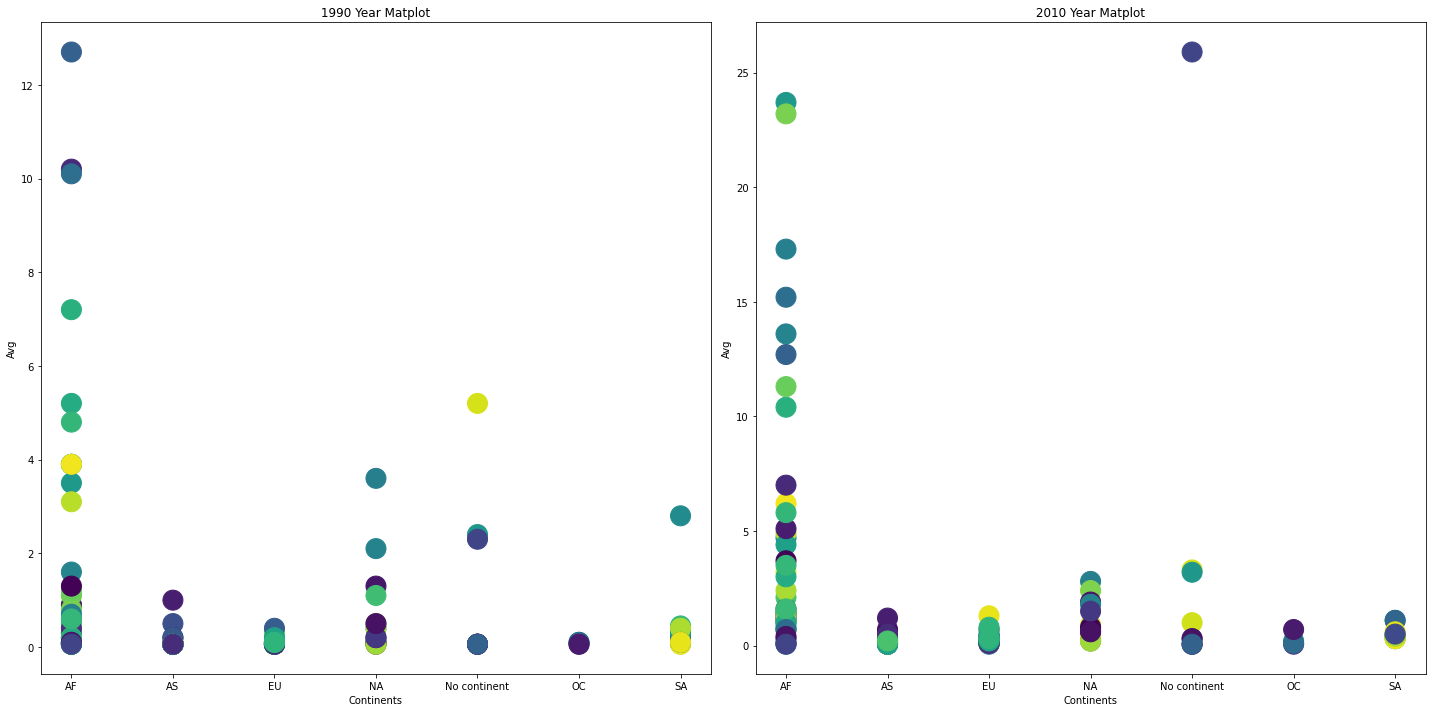

In [8]:
import matplotlib.pyplot as p
import pandas as pd1
import numpy as np
file1=pd1.read_csv('Outputfile.csv')#Read CSV file
file1['Continents'] = file1['Continents'].replace(np.nan, 'NA')# Replaces all null values to NA
file=file1.groupby(['Continents','Estimated HIV Prevalence% - (Ages 15-49)'],as_index=False).mean()#Groupby Continents and Countries column
colors=np.random.RandomState(0)
co=colors.rand(275)
fig=p.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.scatter(file['Continents'],file['1990'],s=400,c=co)
ax2.scatter(file['Continents'],file['2010'],s=400,c=co)
ax1.set_xlabel("Continents")
ax1.set_ylabel("Avg")
ax1.set_title(" 1990 Year Matplot ")
ax2.set_xlabel("Continents")
ax2.set_ylabel("Avg")
ax2.set_title(" 2010 Year Matplot ")
p.tight_layout()